<a href="https://www.kaggle.com/code/idealrausha/digit-recognizer-using-pca-and-knn?scriptVersionId=118557006" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv


****:---  The digit recognizer is a machine learning model designed to classify handwritten digits. The model takes an image of a handwritten digit as input and outputs a predicted label, which is the digit that the model believes the image represents. The training of a digit recognizer typically involves feeding the model a large dataset of images of handwritten digits and their corresponding labels, so that the model can learn to associate specific patterns in the images with specific digits. Once the model has been trained, it can be used to recognize digits in new images.****

The digit recognizer using PCA (Principal Component Analysis) and KNN (K-Nearest Neighbors) algorithm is a machine learning model that is used to classify handwritten digits. Here is a step-by-step guide to building a digit recognizer:
1. Data Preprocessing: The first step is to preprocess the data. This includes converting the images of handwritten digits into numerical data and splitting it into training and testing sets.
2. Dimensionality Reduction using PCA: PCA is used to reduce the dimensionality of the data, which helps to eliminate the noise in the data and increase the accuracy of the model.
3. KNN Classifier: The KNN classifier is used to classify the digits based on their nearest neighbors. The algorithm calculates the distance between the test image and each of the training images and selects the nearest K neighbors. The class of the majority of the K nearest neighbors is then assigned to the test image.
4. Model Training and Evaluation: The model is trained using the training set and evaluated using the testing set. The accuracy of the model can be calculated by comparing the predicted class and actual class of the test images.
5. Predictions: The trained model can be used to predict the class of new images of handwritten digits.
****This digit recognizer using PCA and KNN can achieve high accuracy in recognizing handwritten digits. However, it is important to note that the accuracy of the model depends on several factors such as the size of the training set, the value of K in KNN, and the number of principal components used in PCA.****

In [2]:
# import dataset (Digit recognizer dataset)
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(42000, 785)

In [4]:
# select a sample data from dataset to show the image of digit
data.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6036,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


****In the dataset, 
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.****

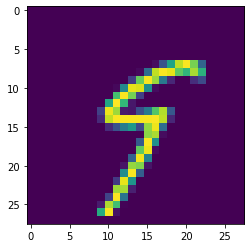

In [6]:
plt.imshow(data.iloc[6036,1:].values.reshape(28,28))
# Here imshow means "image show"

In [8]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [10]:
x_train.shape

(33600, 784)

In [11]:
#using KNN
knn = KNeighborsClassifier()

In [12]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [13]:
y_predict = knn.predict(x_test)

In [14]:
accuracy_score(y_test,y_predict)

0.9648809523809524

In [15]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [16]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [17]:
# Apply the PCA model to reduce the dimension of data
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [18]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [19]:
x_train_trf.shape

(33600, 100)

In [20]:
# Again using KNN after reducing the dimension of data
knn = KNeighborsClassifier()

In [21]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn.predict(x_test_trf)

In [23]:
accuracy_score(y_test,y_pred)

0.9547619047619048

In [24]:
for i in range(1, 785):
    pca = PCA(n_components = i)
    x_train_trf = pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)
    knn = KNeighborsClassifier()
    knn.fit(x_train_trf,y_train)
    y_pred = knn.predict(x_test_trf)
    print(accuracy_score(y_test,y_pred))

0.25833333333333336
0.32416666666666666
0.5105952380952381
0.6658333333333334
0.7380952380952381
0.8229761904761905
0.8432142857142857
0.8723809523809524
0.8866666666666667
0.9054761904761904
0.9113095238095238
0.9188095238095239
0.9282142857142858
0.9334523809523809
0.9388095238095238
0.9383333333333334
0.9392857142857143
0.9403571428571429
0.9423809523809524
0.9436904761904762
0.9433333333333334
0.944047619047619
0.9451190476190476
0.945595238095238
0.9476190476190476
0.9478571428571428
0.9483333333333334
0.9494047619047619
0.9495238095238095
0.9523809523809523
0.9501190476190476
0.9508333333333333
0.950952380952381
0.9519047619047619
0.9529761904761904
0.9522619047619048
0.9516666666666667
0.9520238095238095
0.9530952380952381
0.9534523809523809
0.9539285714285715
0.9541666666666667
0.9535714285714286
0.9534523809523809
0.9542857142857143
0.9529761904761904
0.954047619047619
0.9545238095238096
0.9534523809523809


KeyboardInterrupt: 

In [25]:
# transforming to a 2D coordinate system
pca = PCA(n_components = 2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)
x_train_trf

array([[-2.71871103, -0.49005043],
       [-0.67692259, -6.75265115],
       [-3.03325539,  6.50863544],
       ...,
       [ 2.14893616,  0.78159678],
       [ 1.05948269,  0.94775743],
       [17.70254079,  1.96233021]])

In [26]:
# 2D scatter plot of 784 dimensional data
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=x_train_trf[:,0],
                y=x_train_trf[:,1],
                color = y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [27]:
# transforming to a 3D coordinate system
pca = PCA(n_components = 3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)
x_train_trf

array([[-2.71861059, -0.48998822,  1.13591158],
       [-0.67702483, -6.75315837, -2.33786765],
       [-3.03321548,  6.50944846,  7.49327407],
       ...,
       [ 2.14882275,  0.78101541, -0.74851736],
       [ 1.05962254,  0.94746569,  3.95115287],
       [17.70260052,  1.96221695, -4.94320769]])

In [28]:
# 3D scatter plot of 784 dimensional data
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(data , x=x_train_trf[:,0], y=x_train_trf[:,1],z=x_train_trf[:,2],color = y_train_trf)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()

In [29]:
# Eigen values
pca.explained_variance_

array([40.67111198, 29.17023393, 26.74459536])

In [30]:
# Eigen vectors
pca.components_.shape

(3, 784)

In [31]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [32]:
# transforming to a N-D coordinate system
pca = PCA(n_components = None)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [33]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [34]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

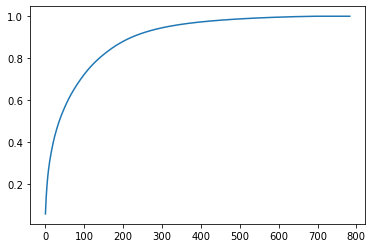

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))